# SVM model for simplified Iris data

In [1]:
# First, load libraries.
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data.
iris = pd.read_csv("iris.data", names=["Sepal length", "Sepal width", "Petal length", "Petal width", "Species"])
iris.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
# One column contains categorical values.
iris["Species"].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [4]:
# There are 3 unique values, but we don't know which ones.
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

[]

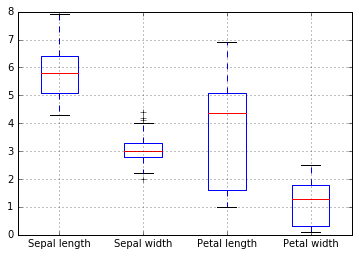

In [5]:
# Visualize distribution of individual numerical features.
iris.boxplot(return_type='axes').plot()

In [6]:
# Keep only two classes of iris dataset.
iris_sub = iris[iris["Species"] != "Iris-setosa"]
iris_sub["Species"].describe()

count                 100
unique                  2
top       Iris-versicolor
freq                   50
Name: Species, dtype: object

In [7]:
# Split dataset to features (keep only the first two) and target classes.
X = iris_sub[["Petal length", "Petal width"]]
y = iris_sub["Species"]

[]

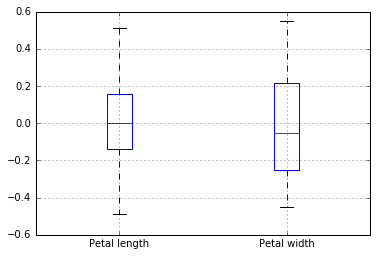

In [8]:
# Normalize features.
X_norm = (X - X.mean()) / (X.max() - X.min())
X_norm.boxplot(return_type='axes').plot()

In [9]:
# Replace classes with bool values.
y_bool = y == "Iris-versicolor"
y = y_bool

In [10]:
# Train linear SVM.
kernel ="linear"
clf = svm.SVC(kernel=kernel, C=1.0, gamma=2)
clf.fit(X, y.tolist())

# Training accuracy
accuracy_score(y.tolist(), clf.predict(X))

0.94999999999999996

[]

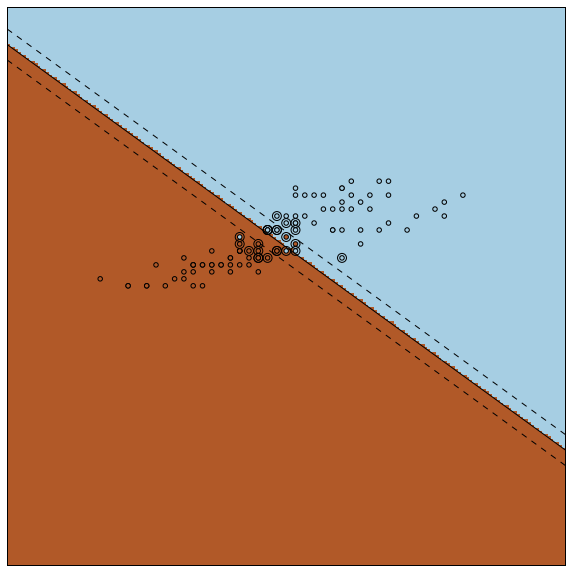

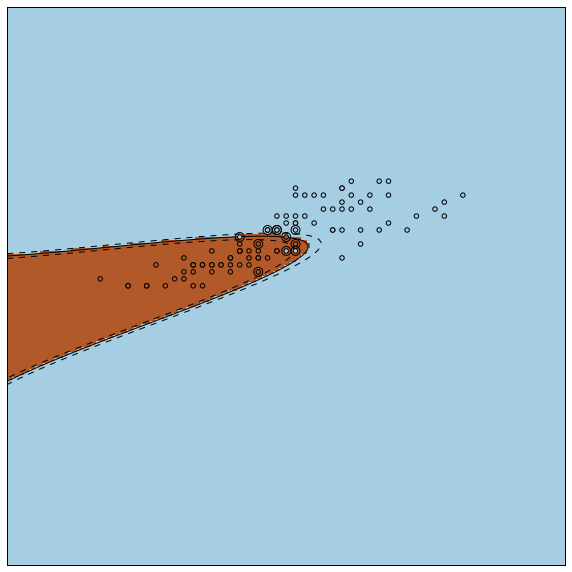

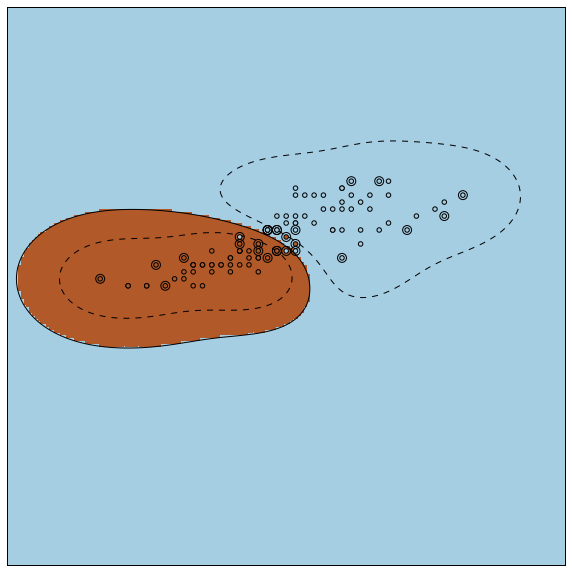

In [11]:
# http://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
fignum = 1
for kernel in ["linear", "poly", "rbf"]:
    clf = svm.SVC(kernel=kernel, C=1.0, gamma=2)
    clf.fit(X, y.tolist())
    
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(10, 10))
    plt.clf()
    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
    plt.scatter(X["Petal length"].tolist(), X["Petal width"].tolist(), c=y.tolist(), zorder=10, cmap=plt.cm.Paired)
    
    plt.axis('tight')
    x_min =  2
    x_max =  8
    y_min = -3
    y_max =  5

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(10, 10))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.plot()